# BDF Introduction

The Jupyter notebook for this demo can be found in:
   - docs/quick_start/demo/bdf_demo.ipynb
   - https://github.com/SteveDoyle2/pyNastran/tree/master/docs/quick_start/demo/bdf_demo.ipynb

Import pyNastran

In [1]:
import os
import pyNastran
print (pyNastran.__file__)
print (pyNastran.__version__)
pkg_path = pyNastran.__path__[0]

from pyNastran.bdf.bdf import BDF, read_bdf
from pyNastran.utils import object_attributes, object_methods

print("pkg_path = %s" % pkg_path)

c:\nasa\m4\formats\git\pynastran\pyNastran\__init__.py
1.4.0+dev.3fa32307f
pkg_path = c:\nasa\m4\formats\git\pynastran\pyNastran


## Let's load the  iSat model into the pyNastranGUI

it's a .dat file, so instead of:

```
>>> pyNastranGUI -i bdf_filename
```
we need to include the format:

```
>>> pyNastranGUI -f nastran -i bdf_filename
```

Alternatively, we could load the model and the results, but in this demo we're just showing off the geometry.  To do that instead:

```
>>> pyNastranGUI -f nastran -i bdf_filename -o op2_filename
```

In [2]:
bdf_filename = os.path.abspath(os.path.join(pkg_path, '..', 'models', 'iSat', 'ISat_Launch_Sm_Rgd.dat'))
#bdf_filename = os.path.abspath(os.path.join(pkg_path, '..', 'models', 'iSat', 'ISat_Dploy_Sm.dat'))
print(bdf_filename)

# look at the model
!pyNastranGUI -f nastran -i {bdf_filename} > junk.out

c:\nasa\m4\formats\git\pynastran\models\iSat\ISat_Launch_Sm_Rgd.dat


## Loading a BDF
There are two ways to load a BDF; the long way or the short way.

The short way instantiates the **```BDF```** class and the short way uses the **```read_bdf```** function.
As this demo was written for the Jupyter Notebook, we'll use **``read_bdf``** and then mention the other method.  The class-based method allows finer control over things like:
 - what cards should be loaded
 - OpenMDAO dynamic syntax support

### The class-based method

In [3]:
print(bdf_filename)

# create the BDF object
bdf = BDF()

# read the file from the GUI
# don't cross-reference
bdf.read_bdf(bdf_filename, xref=False)

c:\nasa\m4\formats\git\pynastran\models\iSat\ISat_Launch_Sm_Rgd.dat


### The function-based method

In [4]:
bdf = read_bdf(bdf_filename, xref=False)

For simplicity of using the demo, we'll again use the ```read_bdf``` method

In [5]:
#bdf_filename = r'D:\work\pynastran_0.8.0_py27\models\iSat\ISat_Launch_Sm_Rgd.dat'
bdf_filename = os.path.abspath(os.path.join(pkg_path, '..', 'models', 'iSat', 'ISat_Launch_Sm_Rgd.dat'))

# read the file as a path
bdf_xref = read_bdf(bdf_filename, xref=True)

## Interrogating the BDF object

IDE's like WingIDE, PyCharm, Spyder and "Python Tools for Visual Studio" make it very easy to program with their object introspection ability.  Unfortunately, because pyNastran has so many functions, it can be difficult to learn the code.

**Some handy object introspection methods were created that will work on all pyNastran objects and even non-pyNastran objects**.  By convention, private data members/functions start with an underscore _, and public ones do not.

We can use the generic object attributes/methods functions

In [6]:
print(object_attributes(bdf))
print(object_methods(bdf))

['MATS1', 'MATS3', 'MATS8', 'MATT1', 'MATT2', 'MATT3', 'MATT4', 'MATT5', 'MATT8', 'MATT9', 'acmodl', 'active_filename', 'active_filenames', 'aecomps', 'aefacts', 'aelinks', 'aelists', 'aeparams', 'aero', 'aeros', 'aestats', 'aesurf', 'aesurfs', 'ao_element_flags', 'asets', 'axic', 'axif', 'baror', 'bconp', 'bcrparas', 'bcs', 'bctadds', 'bctparas', 'bctparms', 'bctsets', 'bdf_filename', 'beamor', 'bfric', 'bgadds', 'bgsets', 'blseg', 'bsets', 'bsurf', 'bsurfs', 'cMethods', 'caero_ids', 'caeros', 'card_count', 'cards_to_read', 'case_control_deck', 'case_control_lines', 'convection_properties', 'coord_ids', 'coords', 'creep_materials', 'csets', 'csschds', 'csuper', 'csupext', 'cyax', 'cyjoin', 'dareas', 'dconadds', 'dconstrs', 'ddvals', 'debug', 'delays', 'dequations', 'desvars', 'divergs', 'dlinks', 'dload_entries', 'dloads', 'dmi', 'dmiax', 'dmig', 'dmigs', 'dmij', 'dmiji', 'dmijis', 'dmijs', 'dmik', 'dmiks', 'dmis', 'doptprm', 'dphases', 'dresps', 'dscreen', 'dtable', 'dti', 'dumplines

#### Let's clean that up a bit

In [7]:
print("attributes = [%s]\n" % ', '.join(bdf.object_attributes()))
print("methods = [%s]\n" % ', '.join(bdf.object_methods()))

attributes = [MATS1, MATS3, MATS8, MATT1, MATT2, MATT3, MATT4, MATT5, MATT8, MATT9, acmodl, active_filename, active_filenames, aecomps, aefacts, aelinks, aelists, aeparams, aero, aeros, aestats, aesurf, aesurfs, ao_element_flags, asets, axic, axif, baror, bconp, bcrparas, bcs, bctadds, bctparas, bctparms, bctsets, bdf_filename, beamor, bfric, bgadds, bgsets, blseg, bsets, bsurf, bsurfs, cMethods, caeros, card_count, cards_to_read, case_control_deck, case_control_lines, convection_properties, coords, creep_materials, csets, csschds, csuper, csupext, cyax, cyjoin, dareas, dconadds, dconstrs, ddvals, debug, delays, dequations, desvars, divergs, dlinks, dload_entries, dloads, dmi, dmiax, dmig, dmigs, dmij, dmiji, dmijis, dmijs, dmik, dmiks, dmis, doptprm, dphases, dresps, dscreen, dtable, dti, dumplines, dvcrels, dvgrids, dvmrels, dvprels, echo, elements, epoints, executive_control_lines, feedge, feface, flfacts, flutters, force_echo_off, frequencies, gmcurv, gmsurf, grdset, gridb, gusts, 

#### Some other very handy methods that will be used later by ```test_bdf```

In [8]:
print(bdf.get_bdf_stats())
print("card_count = %s\n" % bdf.card_count)
print("reject_count = %s" % bdf.reject_count)

---BDF Statistics---
SOL 103

bdf.spcs[1]
  SPC:     1

bdf.params
  PARAM    : 8

bdf.nodes
  GRID     : 5380

bdf.elements
  CBAR     : 827
  CBUSH    : 104
  CHEXA    : 25
  CQUAD4   : 4580
  CTRIA3   : 32

bdf.rigid_elements
  RBE2     : 44

bdf.properties
  PBAR     : 1
  PBARL    : 18
  PBUSH    : 2
  PSHELL   : 8
  PSOLID   : 4

bdf.masses
  CONM2    : 15

bdf.materials
  MAT1     : 14
  MAT8     : 8

bdf.coords
  CORD2R   : 75

bdf.methods
  EIGRL    : 1

bdf.usets
  USET     : 1


card_count = {'ENDDATA': 1, 'PARAM': 8, 'SPC': 1, 'USET': 1, 'EIGRL': 1, 'CORD2R': 75, 'GRID': 5380, 'CQUAD4': 4580, 'CBAR': 827, 'CHEXA': 25, 'RBE2': 44, 'CTRIA3': 32, 'CBUSH': 104, 'CONM2': 15, 'MAT1': 14, 'MAT8': 8, 'PSHELL': 8, 'PBARL': 18, 'PSOLID': 4, 'PBAR': 1, 'PBUSH': 2}

reject_count = {}


## Cross-referencing

Cross-referencing a BDF allows improved usability of the **``BDF``** class.  It comes with some negative side effects, but in general is a very useful thing.  It dramatically minimizes the amount of code you need to write, greatly simplifies future operations, and is highly recommended.

The major downside is it slows down the code.

### Without Cross-Referencing (xref=False)
Here the raw values of the the data objects are returned to us

In [9]:
cquad = bdf.elements[1]
print(cquad)
nid1 = cquad.nodes[0]
print("nid1 = %s" % nid1)
n1 = bdf.nodes[nid1]
cd4 = n1.cd
c4 = bdf.coords[cd4]
print("i (xref=False) = %s" % str(c4.i))
#print object_attributes(c4)

$*
$*  ELEMENT CARDS
$*
CQUAD4         1       1       1       2       4       3

nid1 = 1
i (xref=False) = [1. 0. 0.]


### Cross-Referenced (xref=True)
Here we can trace the referenced objects very easily.

A cross-referenced attribute is indicated with the **``*_ref``** suffix:
  * ``cquad4_element.nodes`` : not cross referenced
  * ``cquad4_element.nodes_ref`` : cross referenced

In [10]:
print("i (xref=True) = %s" % bdf_xref.elements[1].nodes_ref[0].cd_ref.i)

i (xref=True) = [1. 0. 0.]


So how is this done?

In [11]:
cquad.nodes_ref = []
cquad.nodes_ref.append(n1)
print(cquad.nodes_ref[0])

$*
$*  GRID CARDS
$*
GRID           1       4    -4.5    -7.5    -14.       4



#### Let's show off the GRID card

In [12]:
# some Grid methods
n1 = bdf_xref.nodes[1]
print(n1)

# the comment
c1 = bdf_xref.nodes[1].comment
c2 = bdf_xref.nodes[2].comment
print("c1=%r" % c1)
print("c2=%r" % c2)


# get the position of a node
# in the local cooordinate system
print("xyz = %s" % n1.xyz)

# in the global frame
print("position = %s" % n1.get_position())

# in an arbitrary frame
print("wrt5 = %s" % n1.get_position_wrt(bdf, 5))
print("wrt4 = %s" % n1.get_position_wrt(bdf, 4))


$*
$*  GRID CARDS
$*
GRID           1       4    -4.5    -7.5    -14.       4

c1='$*\n$*  GRID CARDS\n$*\n'
c2=''
xyz = [ -4.5  -7.5 -14. ]
position = [ -4.5  -7.5 -14. ]
wrt5 = [  2.12132034  14.         -26.59188309]
wrt4 = [ -4.5  -7.5 -14. ]


Now let's modify the **``GRID``** card and write it out

In [13]:
n1 = bdf_xref.nodes[1]
n1.xyz[1] = -7.5
print("repr  = %s" % n1.repr_fields())
print("raw   = %s" % n1.raw_fields())

#n1.xyz[1] = 100000000000.
print("repr2 = %s" % n1.repr_fields())
print(n1)
print(n1.write_card(size=8))
print(n1.write_card(size=16, is_double=False))
print(n1.write_card(size=16, is_double=True))

repr  = ['GRID', 1, 4, -4.5, -7.5, -14.0, 4, '', None]
raw   = ['GRID', 1, 4, -4.5, -7.5, -14.0, 4, '', 0]
repr2 = ['GRID', 1, 4, -4.5, -7.5, -14.0, 4, '', None]
$*
$*  GRID CARDS
$*
GRID           1       4    -4.5    -7.5    -14.       4

$*
$*  GRID CARDS
$*
GRID           1       4    -4.5    -7.5    -14.       4                

$*
$*  GRID CARDS
$*
GRID*                  1               4            -4.5            -7.5
*                   -14.               4                                

$*
$*  GRID CARDS
$*
GRID*                  1               4-4.500000000D+00-7.500000000D+00
*       -1.400000000D+01               4                                



## Calculating the mass of the structure
You can also calculate the mass of individual groups

In [14]:
from pyNastran.bdf.mesh_utils.mass_properties import mass_properties
from pyNastran.bdf.mesh_utils.breakdowns import get_area_breakdown, get_mass_breakdown, get_volume_breakdown
mass, cg, I = mass_properties(bdf_xref)
print("mass = %s\n" % mass)
#mass_properties(bdf_xref)

area_breakdown = get_area_breakdown(bdf_xref, property_ids=None, sum_bar_area=True)
table_lines = ['%-3s: %g\n' % (k, v) for k, v in sorted(area_breakdown.items())]
print('area_breakdown:\n%s\n' % ''.join(table_lines))

pids_to_mass, mass_type_to_mass = get_mass_breakdown(bdf_xref, property_ids=None, stop_if_no_mass=True)
table_lines = ['%-3s: %g\n' % (k, v) for k, v in sorted(pids_to_mass.items())]
print('mass_breakdown properties:\n%s\n' % ''.join(table_lines))
print('mass_breakdown masses:\n%s\n' % mass_type_to_mass)

volume_breakdown = get_volume_breakdown(bdf_xref, property_ids=None)
table_lines = ['%-3s: %g\n' % (k, v) for k, v in sorted(volume_breakdown.items())]
print('volume_breakdown:\n%s' % ''.join(table_lines))


mass = 1.7746011578443164

area_breakdown:
1  : 2808
2  : 3775.82
3  : 3126.7
4  : 30.7901
7  : 2815.1
9  : 14.8283
10 : 0.471239
12 : 0.536498
13 : 0.888521
14 : 0.704046
15 : 0.582616
16 : 0.614818
19 : 27.9373
21 : 1.88496
22 : 0.134124
23 : 0.176012
33 : 4.52389
34 : 726.206
35 : 7.48892
36 : 8.22838
37 : 3528
38 : 1270.34
39 : 2.63171
41 : 1.13138
42 : 10.99
43 : 18.1152
46 : 741.006


mass_breakdown properties:
1  : 0.0272779
2  : 0.0479928
3  : 0.0209975
4  : 0.0122157
5  : 0.330158
7  : 0.0278135
8  : 0.0815836
9  : 0.0776425
10 : 0.000235972
11 : 0.0416995
12 : 0.00045729
13 : 0.00388513
14 : 0.000352848
15 : 0.00362611
16 : 0
19 : 0.0177488
20 : 0.163082
21 : 0.00362503
22 : 0
23 : 0
33 : 0.00134627
34 : 0.00356109
35 : 0
36 : 0.00719665
37 : 0.0945659
38 : 0.00760223
39 : 0.00243283
41 : 0.000735385
42 : 0.00885413
43 : 0.0122415
46 : 0.00367124


mass_breakdown masses:
{'CONM2': 0.7720000099999998}

volume_breakdown:
1  : 101.088
2  : 203.894
3  : 56.2806
4  : 68.3524
5  : 

### Examples of xref on elements

In [15]:
eid100 = bdf_xref.elements[100]
print(eid100)
print("nodes = %s" % eid100.nodes)
print("--node0--\n%s" % eid100.nodes_ref[0])
print("--cd--\n%s" % eid100.nodes_ref[0].cd)
print("cd.cid = %s" % eid100.nodes_ref[0].cd_ref.cid)

print("area = %s" % eid100.Area())
print("mass = %s" % eid100.Mass())
print("--pid--\n%s" % eid100.pid)
print("pid.pid = %s" % eid100.pid_ref.pid)
print("pid.Pid() = %s" % eid100.Pid())

print(eid100.pid_ref.mid1_ref)
print("type = %s" % eid100.pid_ref.mid1_ref.type)
print("nu12 = %s" % eid100.pid_ref.mid1_ref.nu12)
print("mass = %s" % eid100.Mass())

CQUAD4       100       1     149     152     161     160

nodes = [149, 152, 161, 160]
--node0--
GRID         149       4      3.     7.5   -16.5       4

--cd--
4
cd.cid = 4
area = 3.75
mass = 3.642880307396999e-05
--pid--
1
pid.pid = 1
pid.Pid() = 1
$*
$*  I-DEAS Material: 6  name: BUS_CFRP_PW_ORTHO
$* M46J PW ETW
MAT8           6   1.7+7   1.7+7     .98 340000. 180000. 180000..0001712
                           71.33

type = MAT8
nu12 = 0.98
mass = 3.642880307396999e-05


## Write the modified deck
Let's first switch to the desktop to make the file easy to find

In [16]:
import getpass
name = getpass.getuser()
os.chdir(os.path.join(r'C:\Users', name, 'Desktop'))

In [17]:
pwd

'C:\\Users\\sdoyle\\Desktop'

There are two ways to write a deck
 - **``interspersed``** : alternate properties and elements (similar to how Patran writes decks)
 - **``not-interspersed (default)``** : much faster
 
We can also use 8 or 16 character field width as well as double precision.

Note that double precision only works for certain cards (e.g. ``GRID``, ``COORD``, ``DMIG``) and not much else.

In [18]:
bdf_xref.write_bdf('fem.bdf', interspersed=False, size=8, is_double=False)
!tail -n 5 "fem.bdf"

bdf_xref.write_bdf('fem.bdf', interspersed=True, size=16, is_double=False)
!tail "fem.bdf"

bdf_xref.write_bdf('fem.bdf', interspersed=True, size=16, is_double=True)
!tail "fem.bdf"

CORD2R        75        1.355-13-2.19-15    -40.1.355-13-2.19-15      0.
             40.-2.19-15    -40.
CORD2R        76        1.355-13-2.19-15    -40.1.355-13-2.19-15      0.
             40.-2.19-15    -40.
ENDDATA


*
CORD2R*               75                 1.3549966049-13-2.1854783949-15
*                   -40. 1.3549966049-13-2.1854783949-15              0.
*                    40.-2.1854783949-15            -40.
*
CORD2R*               76                 1.3549966049-13-2.1854783949-15
*                   -40. 1.3549966049-13-2.1854783949-15              0.
*                    40.-2.1854783949-15            -40.
*
ENDDATA


*
CORD2R*               75                1.3549966049D-13-2.185478395D-15
*       -4.000000000D+011.3549966049D-13-2.185478395D-150.0000000000D+00
*       4.0000000000D+01-2.185478395D-15-4.000000000D+01
*
CORD2R*               76                1.3549966049D-13-2.185478395D-15
*       -4.000000000D+011.3549966049D-13-2.185478395D-150.0000000000D+00
*       4.0000000000D+01-2.185478395D-15-4.000000000D+01
*
ENDDATA


In [19]:
bdf_filename

'c:\\nasa\\m4\\formats\\git\\pynastran\\models\\iSat\\ISat_Launch_Sm_Rgd.dat'

## pyNastranGUI

In [20]:
print(bdf_filename)
%echo {bdf_filename}
#!pyNastranGUI -f nastran -i {bdf_filename}

solid_bending_bdf = os.path.abspath(os.path.join(pkg_path, '..', 'models', 'solid_bending', 'solid_bending.bdf'))
solid_bending_op2 = os.path.abspath(os.path.join(pkg_path, '..', 'models', 'solid_bending', 'solid_bending.op2'))

!pyNastranGUI -f nastran -i {solid_bending_bdf} -o {solid_bending_op2}  > junk.out
print("done")

c:\nasa\m4\formats\git\pynastran\models\iSat\ISat_Launch_Sm_Rgd.dat
c:\nasa\m4\formats\git\pynastran\models\iSat\ISat_Launch_Sm_Rgd.dat
done


# We can also script the GUI!

/cygdrive/c/Users/sdoyle/Desktop


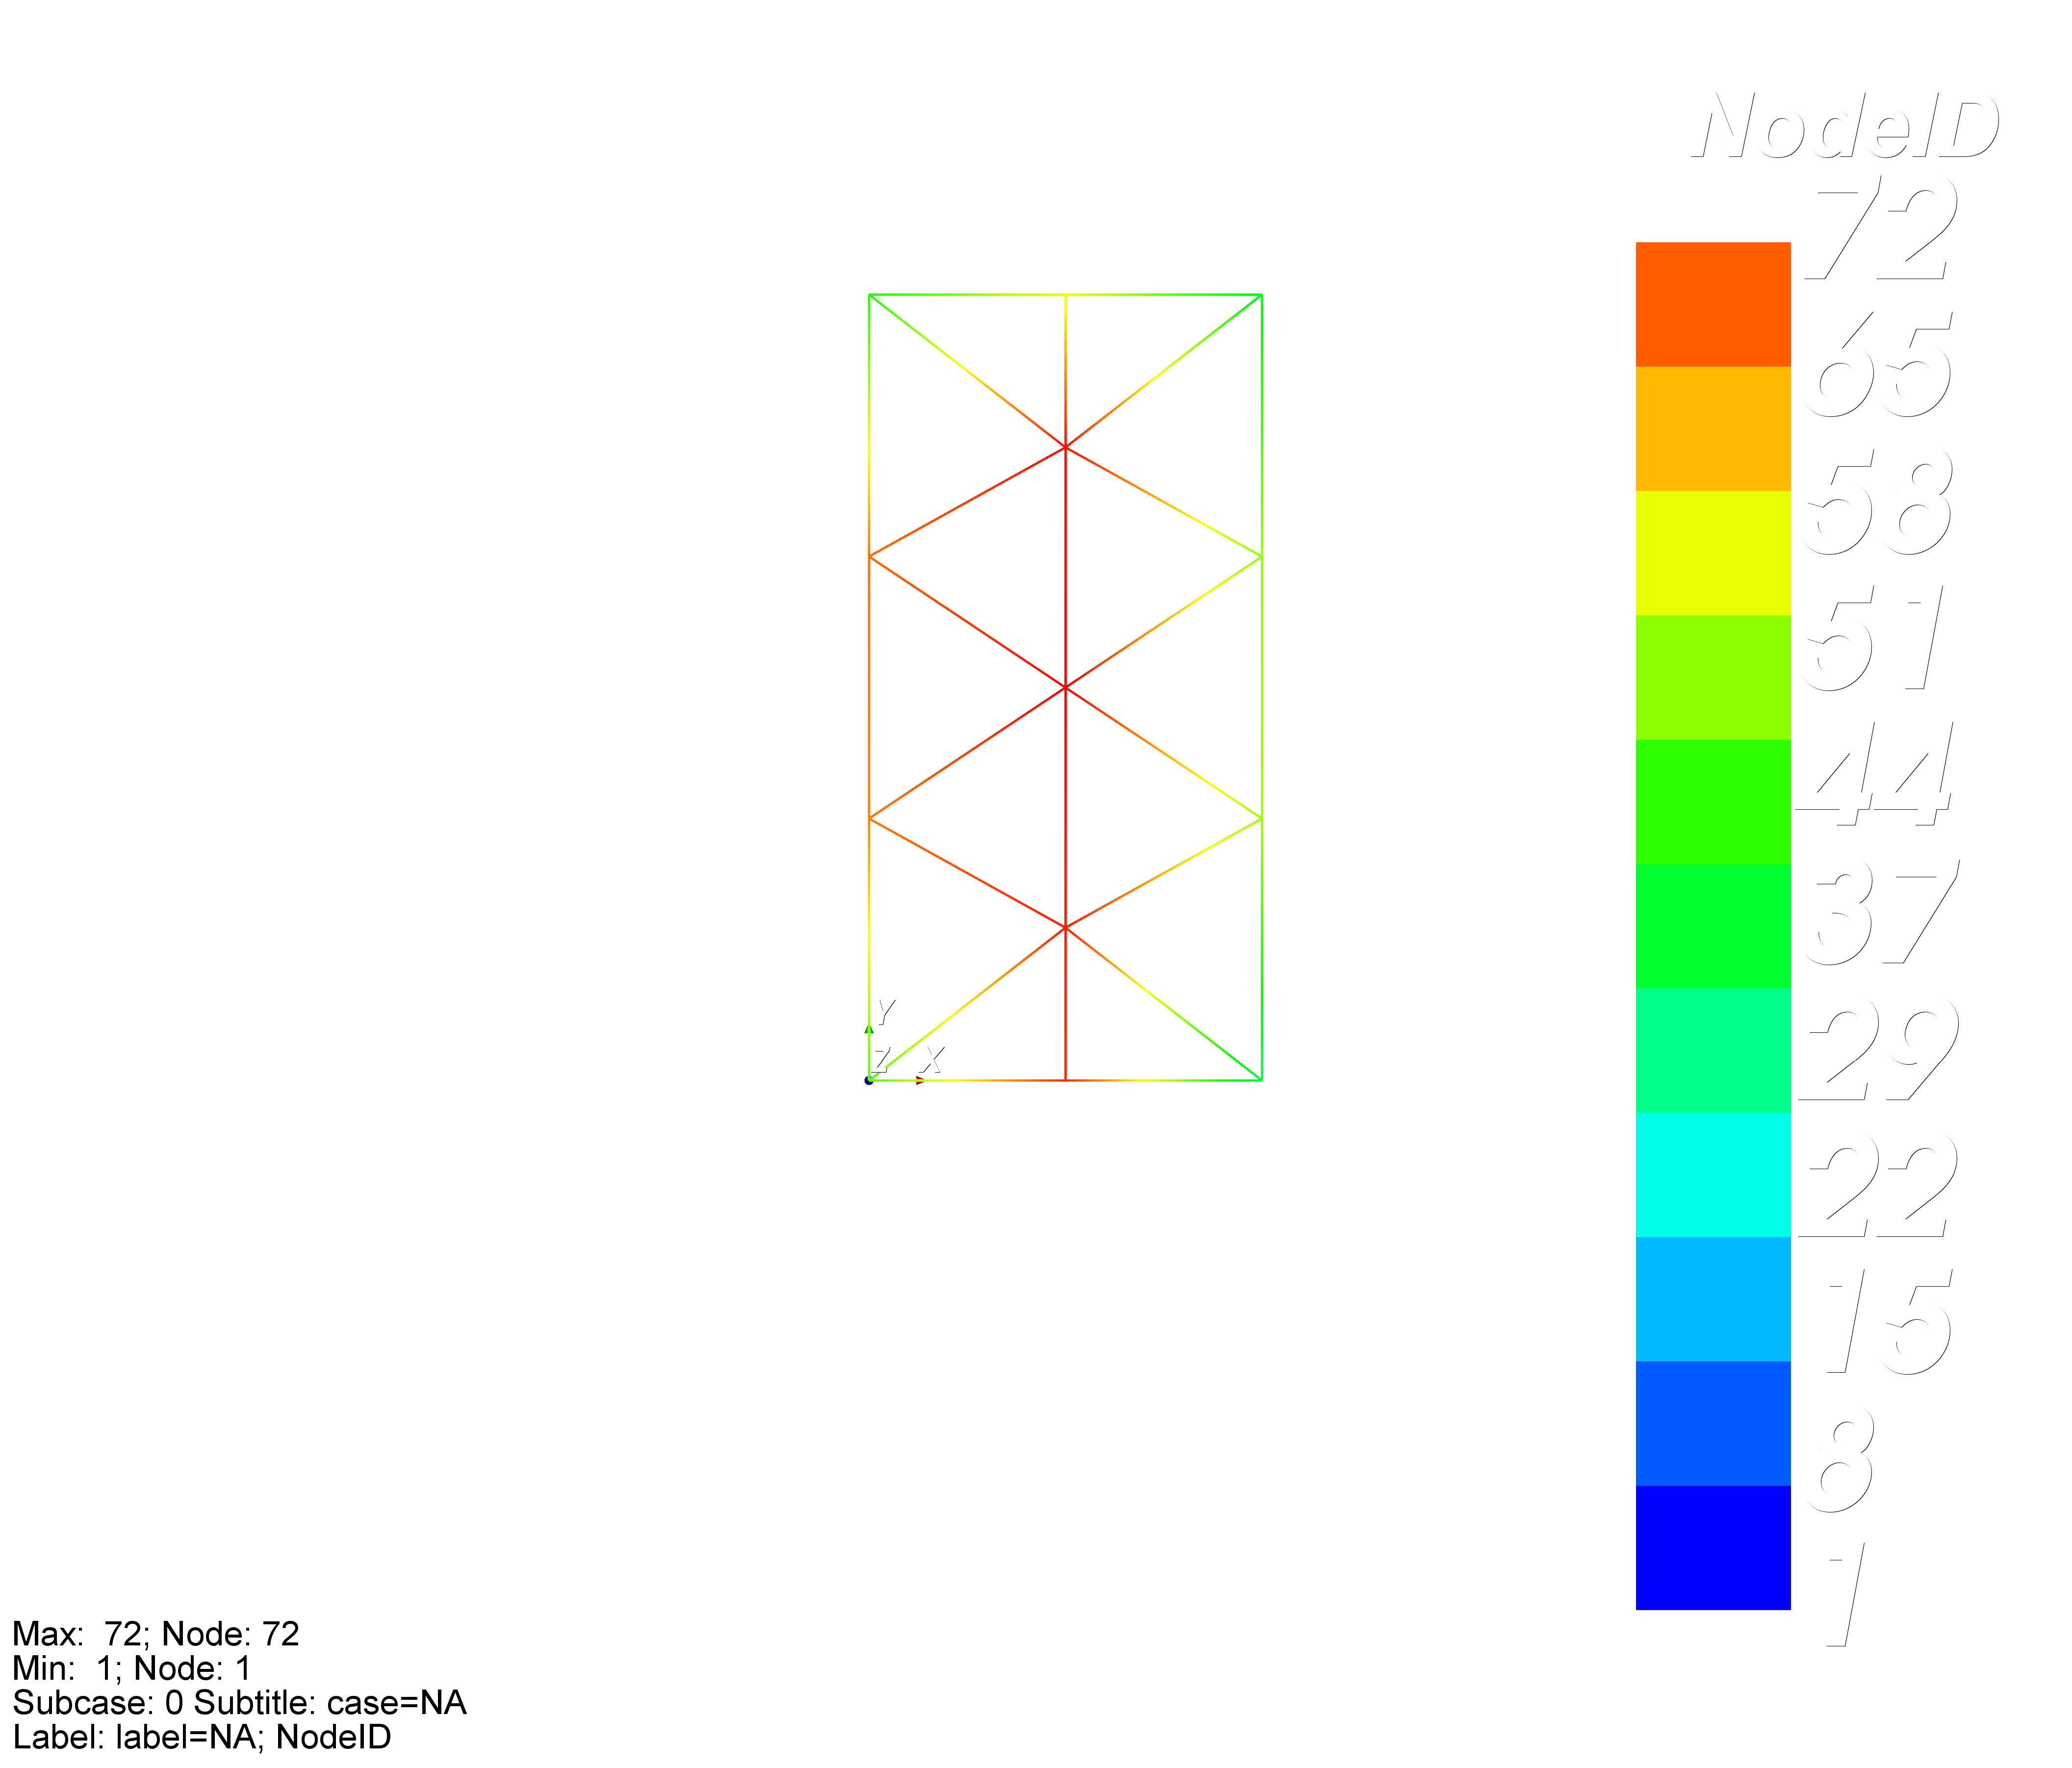

the picture is visible


In [21]:
solid_bending_bdf = os.path.abspath(os.path.join(pkg_path, '..', 'models', 'solid_bending', 'solid_bending.bdf'))
solid_bending_op2 = os.path.abspath(os.path.join(pkg_path, '..', 'models', 'solid_bending', 'solid_bending.op2'))

if os.path.exists('wireframe_solid_bending.png'):
    os.remove('wireframe_solid_bending.png')

with open('script.py', 'w') as f:
    f.write('self.on_wireframe()\n')
    picture_filename = os.path.join(os.getcwd(), 'wireframe_solid_bending.png')
    f.write("self.on_take_screenshot(%r)\n" % picture_filename)
    f.write('sys.exit()')

!pwd
!pyNastranGUI -f nastran -i {solid_bending_bdf} -o {solid_bending_op2} --postscript script.py > junk.out

# display in a popup
!wireframe_solid_bending.png

from IPython.display import Image
from IPython.display import display
assert os.path.exists('wireframe_solid_bending.png')

# display in iPython
i = Image(filename='wireframe_solid_bending.png')
display(i)
print("the picture is visible")